# Fashion Mnist

On this notebook we will create a classifier on the fashion mnist dataset. This dataset consists on 28x28 images of 10 different clothes. We will take a look at the dataset and create the classifier.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


## The Dataset

As we stated above, the Fashion MNIST is a fashion dataset, and its resolution is the same as in the classic MNIST, but we wanted to work on a slightly more complicated task. We have a precreated training and testing dataset: 60000 and 10000 images, and it can be loaded stright from tf

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

As in the MNIST, each instance is an array, and the classes are 0-9 mapped to single ids:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Data Exploration

Let's check some factos about the data:

In [4]:
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Pre-procese el set de datos

El set de datos debe ser pre-procesada antes de entrenar la red. Si usted inspecciona la primera imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

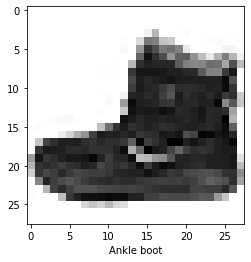

In [6]:
def plot_image(image, label):    
    plt.imshow(image, cmap = plt.cm.binary)
    plt.xlabel(class_names[label])
    plt.grid(False)
plot_image(train_images[0], train_labels[0])
plt.show()

<font color=red><b> Plot some examples in the dataset
</font>

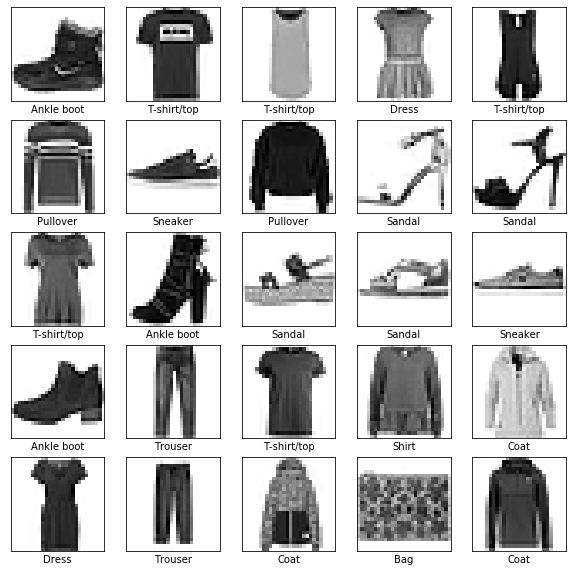

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plot_image(train_images[i], train_labels[i])
plt.show()

## Model Architecture

Let's build a model and train it on the dataset. Our model will consist on:
- A flattening layer
- A relu activated, dense layer with 128 units
- The final layer with the number of categories as the number of units, softmax-activated.
- Adam will be its optimizer
- Use sparse categorical crossentropy as the loss function
- Add accuracy to the compilation metrics

<font color=red><b>Create the moodel and compile it
<br>Hint: use the imported functions </b>
</font>

In [8]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Model training

<font color=red><b>Train the model for 10 epochs. Do we need some preprocessing first?
</font>

In [9]:
model.fit(train_images, train_labels, epochs=10)
train_images = train_images / 255.0
test_images = test_images / 255.0

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 45us/sample - loss: 3.5618 - accuracy: 0.6759
Epoch 2/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.7679 - accuracy: 0.7143
Epoch 3/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.6631 - accuracy: 0.7314
Epoch 4/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.6313 - accuracy: 0.7425
Epoch 5/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.5967 - accuracy: 0.7753
Epoch 6/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.5782 - accuracy: 0.7879
Epoch 7/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.5640 - accuracy: 0.7933
Epoch 8/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.5515 - accuracy: 0.7980
Epoch 9/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.5503 - accuracy: 0.7994
Epoch 10/10
60

### Model accuracy
<font color=red><b>Evaluate the model accuracy
</font>

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 3.7418 - accuracy: 0.1000

Test accuracy: 0.1


What happened?

<font color=red><b> Discuss how can we solve it and do it
</font>

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.6182 - accuracy: 0.7771
Epoch 2/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4727 - accuracy: 0.8288
Epoch 3/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4385 - accuracy: 0.8414
Epoch 4/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.4185 - accuracy: 0.8470
Epoch 5/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.4065 - accuracy: 0.8522
Epoch 6/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3934 - accuracy: 0.8561
Epoch 7/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3841 - accuracy: 0.8602
Epoch 8/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3745 - accuracy: 0.8633
Epoch 9/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3694 - accuracy: 0.8625
Epoch 10/10
60

## Model Predictions

Let's check the model predictions

In [12]:
predictions = model.predict(test_images)
print('logits: ', predictions[0])
print('top class: ', np.argmax(predictions[0]), 'class name: ', class_names[np.argmax(predictions[0])])

logits:  [5.2263829e-08 5.3265956e-09 2.2004606e-11 1.7983931e-08 1.2842715e-11
 3.1163760e-02 6.4528320e-09 6.1316099e-02 3.2904627e-06 9.0751678e-01]
top class:  9 class name:  Ankle boot


We are going to build a visualizatin way to show both the image, its prediction, its actual class and a graph of the probabilities. 

<font color=red><b> Complete the functions for plotting both
</font>

In [13]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    # show the actual image
    plt.imshow(img, cmap=plt.cm.binary)
    # get the label
    predicted_label = np.argmax(predictions_array)
    # plot label in blue if it is a match and in red otherwise
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    # This will plot the histogram of probabilities
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    # get the predicted label
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

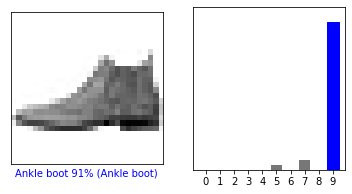

In [14]:
def show_results(i):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
show_results(0)
plt.show()

<font color=red><b> Plot some examples. Find a misclassified example and discuss the probabilities
</font>

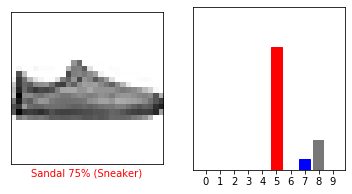

In [15]:
show_results(12)
plt.show()

<font color=red><b> Plot the first X test images, their predicted labels, and the true labels.
</font>

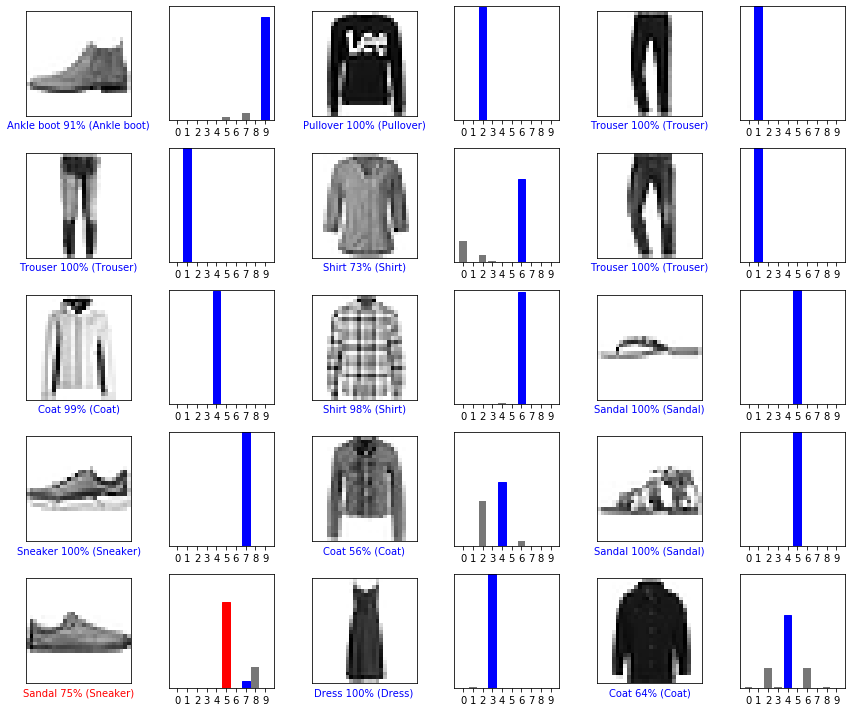

In [16]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#### Single image prediction

<font color=red><b> Just try it. What happens?. How can we fix it?
</font>

In [17]:
# Grab an image from the test dataset.
img = test_images[1]
predictions_single = model.predict((np.expand_dims(img,0)))

print(predictions_single)

[[9.1603397e-06 5.3766258e-13 9.9760509e-01 1.4063961e-10 4.0149229e-04
  6.9648454e-12 1.9842810e-03 3.5688572e-22 2.1694622e-10 2.0130786e-18]]


<font color=red><b> PLot the class probabilities. Add the class names.
<br> Hint: use the xticks function </b>
</font>

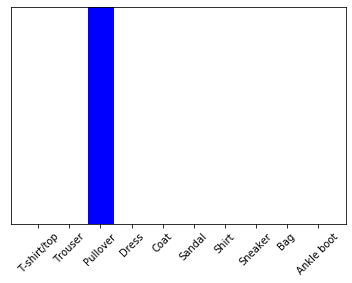

In [18]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)